In [1]:
# Set system error to null for keras backend message
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')

In [348]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

# Load FMNIST data from tensorflow data base
(x_train, y_train), (x_test, y_test) = load_data()

# Split the training data into validation data using 9:1 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=1)

# Preprocess the images
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_val = x_val.reshape(len(x_val), np.prod(x_val.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 9s 172us/step - loss: 0.0535 - val_loss: 0.0329
Epoch 2/20
54000/54000 [==============================] - 8s 155us/step - loss: 0.0304 - val_loss: 0.0285
Epoch 3/20
54000/54000 [==============================] - 7s 129us/step - loss: 0.0273 - val_loss: 0.0268
Epoch 4/20
54000/54000 [==============================] - 7s 139us/step - loss: 0.0258 - val_loss: 0.0255
Epoch 5/20
54000/54000 [==============================] - 8s 142us/step - loss: 0.0250 - val_loss: 0.0249
Epoch 6/20
54000/54000 [==============================] - 8s 146us/step - loss: 0.0245 - val_loss: 0.0244
Epoch 7/20
54000/54000 [==============================] - 9s 172us/step - loss: 0.0241 - val_loss: 0.0241
Epoch 8/20
54000/54000 [==============================] - 9s 167us/step - loss: 0.0237 - val_loss: 0.0239
Epoch 9/20
54000/54000 [==============================] - 9s 169us/step - loss: 0.0234 - val_loss: 0.02

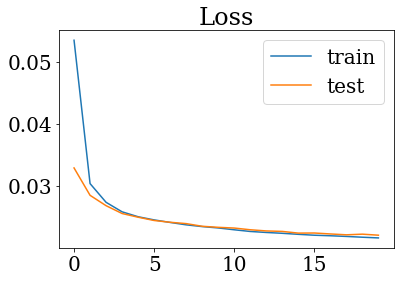

In [386]:
# Build the stacked auto encoder
from tensorflow import keras
from keras.models import Sequential, Model
from keras import layers, Input
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

# Define lasty encodeing layer size
bottleneck_dim = 4

# Construct the encoder
input_img = Input(shape=(784,))
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(200, activation='relu')(encoded)
encoded = Dense(bottleneck_dim, activation='relu')(encoded)

# Construct the decoder
decoded = Dense(200, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# encoder_input = Input(shape=(encoding_dim,))
# decoder_layer = autoencoder.layers[-1]

# decoder = Model(encoder_input, decoder_layer(encoder_input))

# sgd = SGD(lr=0.001, momentum=0.9)
autoencoder.compile(optimizer='adam', loss='mse')

# Compile and train the model
# es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
his = autoencoder.fit(x_train, x_train, epochs=20, batch_size=300, validation_data=(x_val, x_val))

# Plot the performance for each epoch
plt.figure(1)
plt.plot(his.history['loss'], label='train')
plt.plot(his.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()


In [366]:
ae2_loss = his.history['loss']
ae2_test_loss = his.history['val_loss']

In [136]:
ae4_loss = his.history['loss']
ae4_test_loss = his.history['val_loss']

In [134]:
ae8_loss = his.history['loss']
ae8_test_loss = his.history['val_loss']

In [132]:
ae16_loss = his.history['loss']
ae16_test_loss = his.history['val_loss']

In [130]:
ae32_loss = his.history['loss']
ae32_test_loss = his.history['val_loss']

In [128]:
ae64_loss = his.history['loss']
ae64_test_loss = his.history['val_loss']

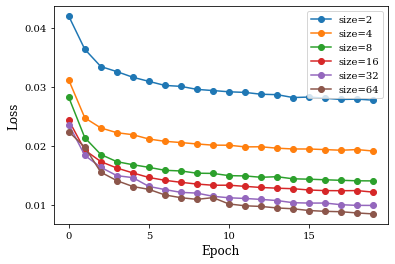

In [174]:
fig24, ax24 = plt.subplots()
ax24.plot(ae2_test_loss, 'o-', label='size=2')
ax24.plot(ae4_test_loss, 'o-', label='size=4')
ax24.plot(ae8_test_loss, 'o-', label='size=8')
ax24.plot(ae16_test_loss, 'o-', label='size=16')
ax24.plot(ae32_test_loss, 'o-', label='size=32')
ax24.plot(ae64_test_loss, 'o-', label='size=64')
ax24.set_xlabel('Epoch', fontsize=12)
ax24.set_ylabel('Loss', fontsize=12)
ax24.legend(loc=1, prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig24.savefig('sae_perf.pdf')

In [181]:
decoded_imgs_e8 = autoencoder.predict(x_test)

In [184]:
decoded_imgs_e16 = autoencoder.predict(x_test)

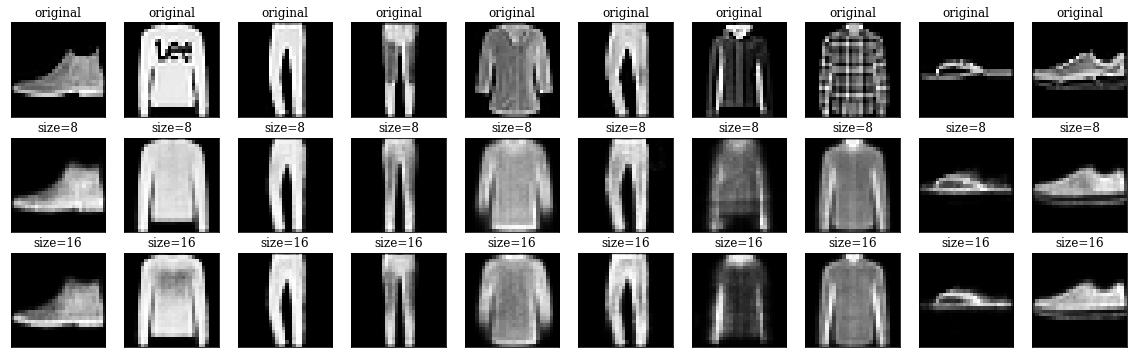

In [203]:
import matplotlib.pyplot as plt

n = 10
fig23 = plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title('original', fontsize=12)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(decoded_imgs_e8[i].reshape(28, 28))
  plt.title('size=8', fontsize=12)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs_e16[i].reshape(28, 28))
  plt.title('size=16', fontsize=12)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
fig23.savefig('sae_decoded.pdf')

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 62us/step - loss: 0.0966 - accuracy: 0.3026 - val_loss: 0.0800 - val_accuracy: 0.3642
Epoch 2/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.0768 - accuracy: 0.4140 - val_loss: 0.0743 - val_accuracy: 0.4555
Epoch 3/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.0724 - accuracy: 0.4700 - val_loss: 0.0707 - val_accuracy: 0.4767
Epoch 4/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.0689 - accuracy: 0.5114 - val_loss: 0.0674 - val_accuracy: 0.5515
Epoch 5/50
54000/54000 [==============================] - 4s 65us/step - loss: 0.0655 - accuracy: 0.5708 - val_loss: 0.0641 - val_accuracy: 0.5703
Epoch 6/50
54000/54000 [==============================] - 4s 69us/step - loss: 0.0625 - accuracy: 0.5752 - val_loss: 0.0615 - val_accuracy: 0.5713
Epoch 7/50
54000/54000 [==============================] - 4s 68us/ste

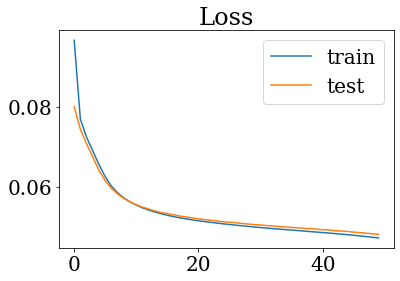

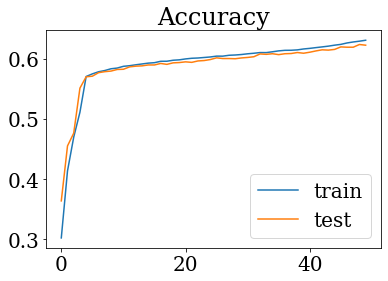

In [387]:
# Build the model 
from tensorflow import keras
from keras.models import Sequential, Model
from keras import layers, Input
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

d = Dense(500, activation='relu')(encoder.output)
d = Dense(256, activation='relu')(d)
y = Dense(10, activation='sigmoid')(d)
sgd = SGD(lr=0.001, momentum=0.9, decay=2e-06)

mlp = Model(inputs=encoder.input, outputs=y)

mlp.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

history = mlp.fit(x_train, y_train, batch_size=200, epochs=50, validation_data=(x_val, y_val))

# Plot the performance for each epoch
plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()

plt.figure(2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()


In [292]:
time2 = [3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3]

In [354]:
e16sl_accu = history.history['accuracy']
e16sl_loss = history.history['loss']
e16sl_test_accu = history.history['val_accuracy']
e16sl_test_loss = history.history['val_loss']

In [352]:
e16dl_accu = history.history['accuracy']
e16dl_loss = history.history['loss']
e16dl_test_accu = history.history['val_accuracy']
e16dl_test_loss = history.history['val_loss']

In [370]:
e2_accu = history.history['accuracy']
e2_loss = history.history['loss']
e2_test_accu = history.history['val_accuracy']
e2_test_loss = history.history['val_loss']

In [388]:
e4_accu = history.history['accuracy']
e4_loss = history.history['loss']
e4_test_accu = history.history['val_accuracy']
e4_test_loss = history.history['val_loss']

In [360]:
e8_accu = history.history['accuracy']
e8_loss = history.history['loss']
e8_test_accu = history.history['val_accuracy']
e8_test_loss = history.history['val_loss']

In [381]:
e16_accu = history.history['accuracy']
e16_loss = history.history['loss']
e16_test_accu = history.history['val_accuracy']
e16_test_loss = history.history['val_loss']

In [373]:
e32_accu = history.history['accuracy']
e32_loss = history.history['loss']
e32_test_accu = history.history['val_accuracy']
e32_test_loss = history.history['val_loss']

In [376]:
e64_accu = history.history['accuracy']
e64_loss = history.history['loss']
e64_test_accu = history.history['val_accuracy']
e64_test_loss = history.history['val_loss']

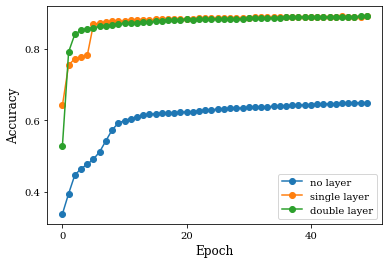

In [377]:
fig9, ax9 = plt.subplots()
ax9.plot(e16_test_accu, 'o-', label='no layer')
ax9.plot(e16sl_test_accu, 'o-', label='single layer')
ax9.plot(e16dl_test_accu, 'o-', label='double layer')
ax9.set_xlabel('Epoch', fontsize=12)
ax9.set_ylabel('Accuracy', fontsize=12)
ax9.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig9.savefig('sae_mlp_layers.pdf')

In [385]:
import statistics
max(e4_test_accu)

0.6836666464805603

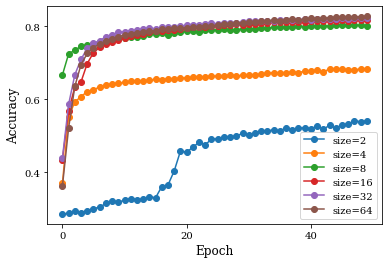

In [382]:
fig8, ax8 = plt.subplots()
ax8.plot(e2_test_accu, 'o-', label='size=2')
ax8.plot(e4_test_accu, 'o-', label='size=4')
ax8.plot(e8_test_accu, 'o-', label='size=8')
ax8.plot(e16_test_accu, 'o-', label='size=16')
ax8.plot(e32_test_accu, 'o-', label='size=32')
ax8.plot(e64_test_accu, 'o-', label='size=64')
ax8.set_xlabel('Epoch', fontsize=12)
ax8.set_ylabel('Accuracy', fontsize=12)
ax8.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# fig8.savefig('sae_mlp_perf.pdf')

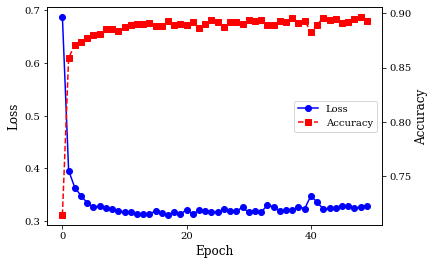

In [243]:
fig5, ax5 = plt.subplots()
l5 = ax5.plot(e16_test_loss, 'bo-', label='Loss')
ax5.set_xlabel('Epoch', fontsize=12)
ax5.set_ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax6 = ax5.twinx()
l6 = ax6.plot(e16_test_accu, 'rs--', label='Accuracy')
ax6.set_ylabel('Accuracy' ,fontsize=12)
plt.yticks(fontsize=10)
leg = l5+l6
labs = [l.get_label() for l in leg]
ax5.legend(leg, labs, loc=5, prop={'size': 10})
plt.show()
fig5.savefig('sae_mlp_la.pdf')

In [226]:
from sklearn.metrics import confusion_matrix

# Evalated the model with testing set
score = mlp.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy', score[1])

10000/10000 [==============================] - 1s 108us/step
Test loss: 0.33530894840955733
Test accuracy 0.886900007724762


Saved: sae_mlp_conf.pdf


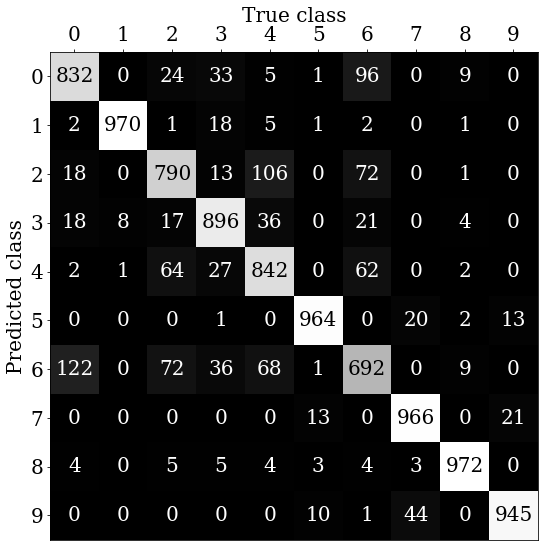

In [227]:
pred = mlp.predict(x_test)
y_classes = pred.argmax(axis=-1)

# Generate confusion matrix and plot it
conf = confusion_matrix(y_test, y_classes)
conf_tosave = 'sae_mlp_conf.pdf'
plot_conf(conf, conf_tosave)


In [68]:
def plot_conf(conf, tosave=None):
# Plot the confusion matrix

    import matplotlib
    import matplotlib.pyplot as plt
    matplotlib.rc('font', size=20, family='serif')
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(conf)
    color_threshold = conf.max() / 2.
    for x in range(conf.shape[1]):
        for y in range(conf.shape[0]):
            val = conf[y, x]
            color = 'w' if val < color_threshold else 'k'
            ax.text(x, y, '%d'%val, ha='center', va='center', color=color, fontsize=20)
    ax.set_xticks(np.arange(conf.shape[1]))
    ax.set_yticks(np.arange(conf.shape[0]))
    ax.set_xticklabels(np.arange(conf.shape[1]))
    ax.set_yticklabels(np.arange(conf.shape[0]))
    ax.set_xlabel('True class')
    ax.set_ylabel('Predicted class')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_aspect('equal')
    fig.tight_layout()
    if type(tosave)!=type(None): fig.savefig(tosave); print('Saved: %s'%tosave)
    plt.show()

In [297]:
# Read log file from QMI training results
file = open('train_lr1e-04_time.log', 'r')
lines = file.read().splitlines()
file.close()
ne = []
time = []
for epoch in lines[1:41]:
    ne.append(int(epoch[0:2]))
    time.append(float(epoch[6:13]))
time3 = [1097, 774, 778, 939, 801, 833, 843, 865, 880]

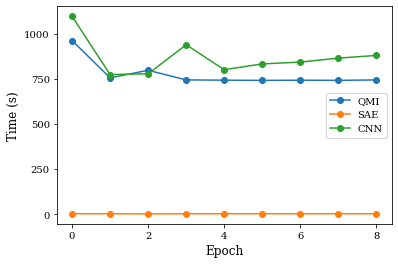

In [333]:
fig7, ax7 = plt.subplots()
ax7.plot(time[0:9], 'o-', label='QMI')
ax7.plot(time2[0:9], 'o-', label='SAE')
ax7.plot(time3, 'o-', label='CNN')
ax7.set_xlabel('Epoch', fontsize=12)
ax7.set_ylabel('Time (s)', fontsize=12)
ax7.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig7.savefig('compare_time.pdf')

In [323]:
# Load performance data of QMI
file2 = open('train_lr1e-04_trainedall_backup.log', 'r')
lines2 = file2.read().splitlines()
file2.close()
qmi_loss = []
qmi_accu = []
for epoch in lines2[1:41]:
    qmi_loss.append(float(epoch[6:15]))
    qmi_accu.append(float(epoch[16:22]))
cnn_accu = [0.8897, 0.9043, 0.9142, 0.9192, 0.9157, 0.9073, 0.9187, 0.9222, 0.9183]
cnn_loss = [0.3077, 0.2777, 0.2481, 0.2562, 0.2686, 0.2670, 0.2602, 0.2585, 0.2763]

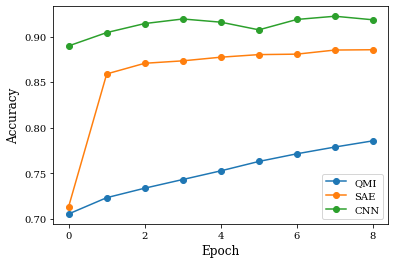

In [337]:
fig3, ax3 = plt.subplots()
ax3.plot(qmi_accu[0:9], 'o-', label='QMI')
ax3.plot(e16_test_accu[0:9], 'o-', label='SAE')
ax3.plot(cnn_accu, 'o-', label='CNN')
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Accuracy', fontsize=12)
ax3.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig3.savefig('compare_accu.pdf')

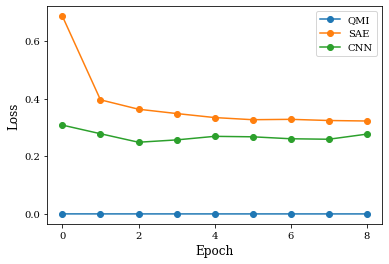

In [338]:
fig2, ax2 = plt.subplots()
ax2.plot(qmi_loss[0:9], 'o-', label='QMI')
ax2.plot(e16_test_loss[0:9], 'o-', label='SAE')
ax2.plot(cnn_loss, 'o-', label='CNN')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig2.savefig('compare_loss.pdf')

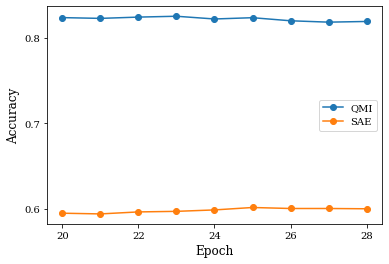

In [407]:
fig4, ax4 = plt.subplots()
ax4.plot(a, qmi_accu[20:29], 'o-', label='QMI')
ax4.plot(a, e4_test_accu[20:29], 'o-', label='SAE')
ax4.set_xlabel('Epoch', fontsize=12)
ax4.set_ylabel('Accuracy', fontsize=12)
ax4.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
fig4.savefig('compare_mlp.pdf')

In [403]:
a = [20, 21, 22, 23, 24, 25, 26, 27, 28]